In [69]:
import numpy as np
import pandas as pd


In [70]:
df=pd.read_csv("C:\\Users\\RABIN RESIN\\Desktop\\luminar\\development-journey\\mechine learning journey\\NaivBayes ----Algorithm\\loan_approval_dataset.csv.xls")

In [71]:
df.shape

(4269, 13)

In [72]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [73]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [74]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [75]:
df.drop(columns="loan_id",inplace=True)

In [76]:
df[df.duplicated()]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


In [77]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [78]:
x

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [79]:
y

0        Approved
1        Rejected
2        Rejected
3        Rejected
4        Rejected
          ...    
4264     Rejected
4265     Approved
4266     Rejected
4267     Approved
4268     Approved
Name:  loan_status, Length: 4269, dtype: object

In [80]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([("encoded",OneHotEncoder(),[" education"," self_employed"])],remainder="passthrough")
x=pd.DataFrame(ct.fit_transform(x))
x


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,1.0,0.0,2.0,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0
1,0.0,1.0,0.0,1.0,0.0,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0
2,1.0,0.0,1.0,0.0,3.0,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0
3,1.0,0.0,1.0,0.0,3.0,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0
4,0.0,1.0,0.0,1.0,5.0,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1.0,0.0,0.0,1.0,5.0,1000000.0,2300000.0,12.0,317.0,2800000.0,500000.0,3300000.0,800000.0
4265,0.0,1.0,0.0,1.0,0.0,3300000.0,11300000.0,20.0,559.0,4200000.0,2900000.0,11000000.0,1900000.0
4266,0.0,1.0,1.0,0.0,2.0,6500000.0,23900000.0,18.0,457.0,1200000.0,12400000.0,18100000.0,7300000.0
4267,0.0,1.0,1.0,0.0,1.0,4100000.0,12800000.0,8.0,780.0,8200000.0,700000.0,14100000.0,5800000.0


In [81]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 1, 1, ..., 1, 0, 0], shape=(4269,))

In [82]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [83]:
xtrain

,0,1,2,3,4,5,6,7,8,9,10,11,12
1675,0.0,1.0,1.0,0.0,5.0,7900000.0,29900000.0,6.0,568.0,5800000.0,13900000.0,15900000.0,8700000.0
1164,0.0,1.0,0.0,1.0,0.0,9600000.0,34000000.0,12.0,710.0,23800000.0,10300000.0,38100000.0,7800000.0
192,1.0,0.0,1.0,0.0,1.0,800000.0,2900000.0,8.0,682.0,2200000.0,1100000.0,2900000.0,700000.0
910,1.0,0.0,0.0,1.0,2.0,4900000.0,13100000.0,18.0,754.0,8200000.0,3300000.0,16500000.0,7200000.0
567,1.0,0.0,0.0,1.0,5.0,3000000.0,11100000.0,12.0,441.0,8500000.0,2500000.0,7300000.0,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,1.0,0.0,0.0,1.0,0.0,1300000.0,4700000.0,16.0,530.0,3200000.0,1000000.0,3800000.0,800000.0
466,0.0,1.0,0.0,1.0,5.0,500000.0,1800000.0,18.0,411.0,1000000.0,500000.0,1300000.0,200000.0
3092,0.0,1.0,0.0,1.0,4.0,8600000.0,20600000.0,16.0,449.0,10800000.0,10600000.0,28700000.0,5400000.0
3772,0.0,1.0,0.0,1.0,2.0,7000000.0,21400000.0,12.0,541.0,3700000.0,1300000.0,19800000.0,9600000.0


In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [85]:
xtrain

array([[-1.00263891,  1.00263891,  1.01504731, ...,  2.04678575,
         0.07808278,  1.16041374],
       [-1.00263891,  1.00263891, -0.98517575, ...,  1.22311091,
         2.49843196,  0.88201987],
       [ 0.99736803, -0.99736803,  1.01504731, ..., -0.8818359 ,
        -1.33923881, -1.31419838],
       ...,
       [-1.00263891,  1.00263891, -0.98517575, ...,  1.29175048,
         1.47359943,  0.13963624],
       [-1.00263891,  1.00263891, -0.98517575, ..., -0.83607619,
         0.50327926,  1.4388076 ],
       [ 0.99736803, -0.99736803,  1.01504731, ..., -0.28695963,
         1.03750048, -0.10782497]], shape=(3415, 13))

In [86]:
xtest

array([[ 0.99736803, -0.99736803,  1.01504731, ...,  1.15447134,
         0.05627784,  0.72735662],
       [ 0.99736803, -0.99736803,  1.01504731, ...,  1.04007205,
         0.28522978,  0.54176071],
       [ 0.99736803, -0.99736803,  1.01504731, ...,  2.57302245,
         1.45179448,  0.51082806],
       ...,
       [-1.00263891,  1.00263891, -0.98517575, ...,  0.49095549,
        -0.37982112,  0.88201987],
       [-1.00263891,  1.00263891,  1.01504731, ..., -0.83607619,
        -1.0121646 , -1.09766982],
       [-1.00263891,  1.00263891,  1.01504731, ...,  0.14775765,
        -0.59787059, -0.97393921]], shape=(854, 13))

In [87]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(xtrain,ytrain)

GaussianNB()

In [88]:
y_pred=gb.predict(xtest)

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred)

0.936768149882904

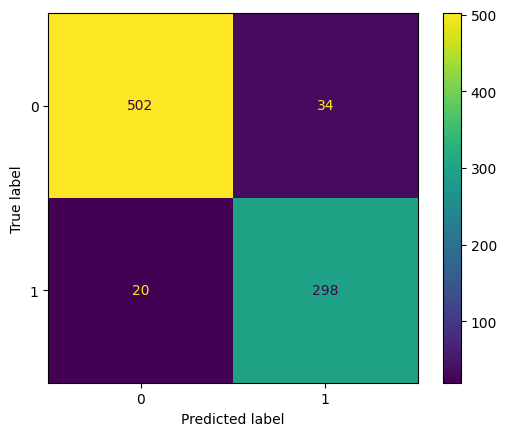

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,f1_score
ConfusionMatrixDisplay.from_predictions(ytest,y_pred)

In [91]:
precision_score(ytest,y_pred)

0.8975903614457831

In [92]:
recall_score(ytest,y_pred)

0.9371069182389937

In [93]:
f1_score(ytest,y_pred)

0.916923076923077